In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
comb_df = train_df.append(test_df)

# msno (users)

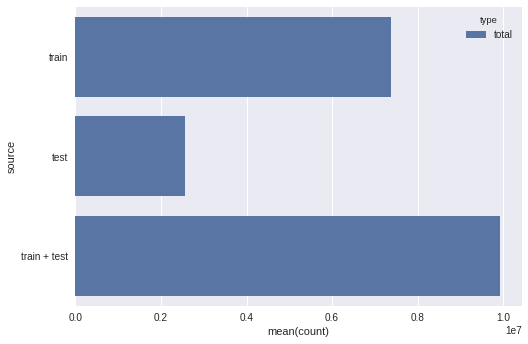

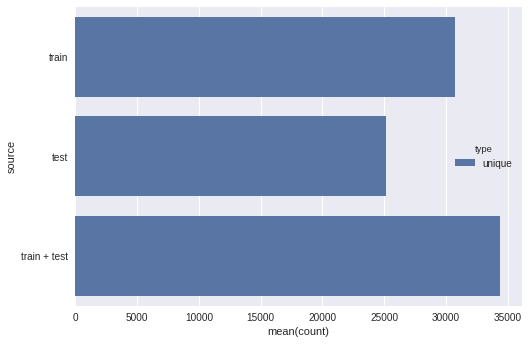

0.42% unique users are contained in train set
0.98% unique users are contained in test set
0.35% unique users are contained in (train + test) set


,count,source,type
0,7377418,train,total
1,2556790,test,total
2,9934208,train + test,total


In [5]:
train_unique_msno_series = train_df['msno'].drop_duplicates()
test_unique_msno_series = test_df['msno'].drop_duplicates()
comb_unique_msno_series = comb_df['msno'].drop_duplicates()

msno_df = pd.DataFrame(data={
    'source': ['train', 'test', 'train + test'],
    'type': ['total', 'total', 'total'],
    'count': [train_df.shape[0],
              test_df.shape[0],
              comb_df.shape[0]]
})
sns.barplot(x='count', y='source', hue='type', data=msno_df)
sns.plt.show()

msno_unique_df = pd.DataFrame(data={
    'source': ['train', 'test', 'train + test'],
    'type': ['unique', 'unique', 'unique'],
    'count': [len(train_unique_msno_series),
              len(test_unique_msno_series),
              len(comb_unique_msno_series)]
})
sns.barplot(x='count', y='source', hue='type', data=msno_unique_df)
sns.plt.show()

print('%.2f%% unique users are contained in train set' % (len(train_unique_msno_series) / train_df.shape[0] * 100))
print('%.2f%% unique users are contained in test set' % (len(test_unique_msno_series) / test_df.shape[0] * 100))
print('%.2f%% unique users are contained in (train + test) set' % (len(comb_unique_msno_series) / comb_df.shape[0] * 100))
msno_df

- **train set** has **7377418 rows** and has only **30755 unique** users. Each user contributes **238 rows in average**.
- **test set** has **2556790 rows** and has only **25131 unique** users. Each user contributes **102 rows in average**.
- **(train + test) set** has **9934208 rows** and has only **34403 unique** users.
- **9272 unique** users are contained in **(train \ test) set**.
- **3648 unique** users are contained in **(test \ train) set**.

3648 / 25131 = **14.5% of users** in test set which not shown in train set.

In [4]:
train_minus_test_by_msno_df = train_df[~train_df['msno'].isin(test_unique_msno_series)]
test_minus_train_by_msno_df = test_df[~test_df['msno'].isin(train_unique_msno_series)]

print('%d rows are contained in train set but not contained in test set' % len(train_minus_test_by_msno_df))
print('%d rows are contained in test set but not contained in train set' % len(test_minus_train_by_msno_df))

431857 rows are contained in train set but not contained in test set
184018 rows are contained in test set but not contained in train set


184018 / 2556790 = **7.2% of rows** in test set which not shown in train set.